Here is a manual on how to run the chemprop model regarding the article entitled "*A machine learning model trained on a high-throughput antibacterial screen increases the hit rate of drug discovery*"

In this project we will run the model with the dataset used in above article. Next, we aim to reduce the train size (keep the val & test size fixed) to analyze the changes in prediction scores and find the minimum number of train set that keeps the scores high!

For a complete set of details you can check the following GitHub page.
https://github.com/chemprop/chemprop

# The first step is to get the Chemprop package

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local


--2024-01-31 01:30:19--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141613749 (135M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 135.05M   139MB/s    in 1.0s    

2024-01-31 01:30:20 (139 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [141613749/141613749]

PREFIX=/usr/local
Unpacking payload ...
                                                                                        
Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.
  

In [5]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')


In [6]:
!conda --version

conda 23.11.0


In [2]:
!conda create -n chemprop python=3.8

Remove existing environment (y/[n])? y

Channels:
 - defaults
Platform: linux-64
Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/chemprop

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main 
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu 
  ca-certificates    pkgs/main/linux-64::ca-certificates-2023.12.12-h06a4308_0 
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.38-h1181459_1 
  libffi             pkgs/main/linux-64::libffi-3.4.4-h6a678d5_0 
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-11.2.0-h1234567_1 
  libgomp            pkgs/main/linux-64::libgomp-11.2.0-h1234567_1 
  libstdcxx-ng       pkgs/main/linux-64::libstdcxx-ng-11.2.0-h1234567_1 
  ncurses            pkgs/main/linux-64::ncurses-6.4-h6a678d5_0 
  openssl            pkgs/main/linux-64::openssl-3.0.12-h7f8727e_0 
  pip                pkgs/main/

In [4]:
!source activate chemprop

In [5]:
!pip install chemprop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 48.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
!pip install git+https://github.com/bp-kelley/descriptastorus

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-gnmum3b_
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-gnmum3b_
  Resolved https://github.com/bp-kelley/descriptastorus to commit da9760932ab9a78b116bc697795dd9e1798f087a
  Preparing metadata (setup.py) ... done
  Created wheel for descriptastorus: filename=descriptastorus-2.5.0.23-py3-none-any.whl size=1083543 sha256=1148bd493951485ff6cbc3f20479228052b49b5b693236565ebd992495118197
  Stored in directory: /tmp/pip-ephem-wheel-cache-53zzomtf/wheels/a5/37/b0/bc8b04ad2a1d1f3e17a7bff134d2a7e63621914e0a01d983a6
Successfully built descriptastorus


In [8]:
!git clone https://github.com/chemprop/chemprop

Cloning into 'chemprop'...
remote: Enumerating objects: 22981, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 22981 (delta 307), reused 403 (delta 281), pack-reused 22504
Receiving objects: 100% (22981/22981), 405.14 MiB | 27.38 MiB/s, done.
Resolving deltas: 100% (13211/13211), done.


In [9]:
%cd chemprop

#!pip install -e .

import chemprop


/content/chemprop


In [ ]:
smiles = pd.read_csv("/content/Library_10.csv")
smiles.head()

,SMILE,ug/mL,Activity
0,Cc1cc(O)c(C(=O)/C=C/c2ccc(OCc3cn(-c4ccc(Br)cc4...,0.001525,Active
1,C[N+](C)(C)CCCCCCCCCCCS.[Cl-],157.012386,Inactive
2,CCCCCCCCCC[N+](C)(C)CCCCCCCCCCCS.[Cl-],126.086802,Inactive
3,CCCCCCCCCCCCCC[N+](C)(C)CCCNC(=O)CCCCCCCCCCS.[...,236.526466,Inactive
4,COc1ccc(-n2cc(COc3ccc(/C=N/Nc4nc(-c5ccc([N+](=...,7.755279,Active


In [ ]:
smiles['Activity'] = smiles['Activity'].apply(lambda x: 1 if x =="Active" else 0)
smiles.head()

,SMILE,ug/mL,Activity
0,Cc1cc(O)c(C(=O)/C=C/c2ccc(OCc3cn(-c4ccc(Br)cc4...,0.001525,1
1,C[N+](C)(C)CCCCCCCCCCCS.[Cl-],157.012386,0
2,CCCCCCCCCC[N+](C)(C)CCCCCCCCCCCS.[Cl-],126.086802,0
3,CCCCCCCCCCCCCC[N+](C)(C)CCCNC(=O)CCCCCCCCCCS.[...,236.526466,0
4,COc1ccc(-n2cc(COc3ccc(/C=N/Nc4nc(-c5ccc([N+](=...,7.755279,1


In [ ]:
smiles.shape

(27002, 3)

In [ ]:
from sklearn.metrics.pairwise import normalize
smiles['Activity'].value_counts(normalize=True)*100

0    65.224798
1    34.775202
Name: Activity, dtype: float64

In [ ]:
smiles.to_csv("binaryData.csv", index = False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_and_save_csv(file_path, train_path, val_path, test_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Split the data into 80% train and 20% temp
    train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

    # Split the temp data into 50% val and 50% test (which makes 10% of the original data each)
    val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

    # Save the splits into new CSV files
    train_data.to_csv(train_path, index=False)
    val_data.to_csv(val_path, index=False)
    test_data.to_csv(test_path, index=False)

# Example usage
split_and_save_csv('/content/chemprop/binaryData.csv', 'train_data.csv', 'val_data.csv', 'test_data.csv')


In [12]:
!python hyperparameter_optimization.py --data_path /content/chemprop/cleaned_MOA_data_binary.csv --features_path /content/chemprop/data_transformer_features.csv   --dataset_type classification --smiles_column SMILE --target_column Activity --num_iters 1 --epochs 15 --config_save_path /content/chemprop/hypertest/final_h.json --save_dir /content/chemprop/heper_results

Streaming output truncated to the last 5000 lines.

 49%|####8     | 210/431 [00:56<00:47,  4.69it/s]

 49%|####8     | 211/431 [00:57<01:22,  2.67it/s]

 49%|####9     | 212/431 [00:57<01:08,  3.21it/s]

 49%|####9     | 213/431 [00:58<01:06,  3.30it/s]

 50%|####9     | 214/431 [00:58<00:54,  3.98it/s]

 50%|####9     | 215/431 [00:58<00:51,  4.18it/s]

Loss = 3.6505e-01, PNorm = 98.0491, GNorm = 0.9615, lr_0 = 3.1480e-04

 50%|#####     | 217/431 [00:59<00:58,  3.69it/s]

 51%|#####     | 218/431 [00:59<00:49,  4.32it/s]

 51%|#####     | 219/431 [01:00<01:37,  2.18it/s]

 51%|#####1    | 221/431 [01:00<01:16,  2.75it/s]

 52%|#####1    | 223/431 [01:01<01:00,  3.42it/s]

 52%|#####2    | 225/431 [01:01<00:58,  3.53it/s]

Loss = 4.1285e-01, PNorm = 98.1000, GNorm = 0.6920, lr_0 = 3.1350e-04

 53%|#####2    | 227/431 [01:02<01:10,  2.89it/s]

 53%|#####3    | 229/431 [01:02<00:56,  3.59it/s]

 54%|#####3    | 231/431 [01:03<00:46,  4.28it/s]

 54%|#####4    | 233/431 [01:03<00:45,  4

In [ ]:
!python hyperparameter_optimization.py --data_path /content/chemprop/train_data.csv --separate_val_path /content/chemprop/val_data.csv --separate_test_path /content/chemprop/test_data.csv --dataset_type classification --smiles_column SMILE --target_column Activity --num_iters 2 --epochs 15 --config_save_path /content/chemprop/hypertest/final_h.json

In [ ]:
!python fingerprint.py --test_path /content/chemprop/test_data.csv --checkpoint_path /content/chemprop/newtrain2/fold_0/model_0/model.pt

In [16]:
!python train.py --data_path /content/chemprop/heper_results/trial_seed_1/fold_0/train_full.csv --features_path /content/chemprop/heper_results/trial_seed_1/fold_0/train_features.csv --separate_val_path /content/chemprop/heper_results/trial_seed_1/fold_0/val_full.csv --separate_val_features_path /content/chemprop/heper_results/trial_seed_1/fold_0/val_features.csv --separate_test_path /content/chemprop/heper_results/trial_seed_1/fold_0/test_full.csv --separate_test_features_path /content/chemprop/heper_results/trial_seed_1//fold_0/test_features.csv  --dataset_type classification --save_dir /content/chemprop/random_split_withtrans_only --smiles_column SMILE --target_column Activity  --epochs 15 --extra_metrics {prc-auc,f1}

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Command line
python train.py --data_path /content/chemprop/heper_results/trial_seed_1/fold_0/train_full.csv --features_path /content/chemprop/heper_results/trial_seed_1/fold_0/train_features.csv --separate_val_path /content/chemprop/heper_results/trial_seed_1/fold_0/val_full.csv --separate_val_features_path /content/chemprop/heper_results/trial_seed_1/fold_0/val_features.csv --separate_test_path /content/chemprop/heper_results/trial_seed_1/fold_0/test_full.csv --separate_test_features_path /content/chemprop/heper_results/trial_seed_1//fold_0/test_features.csv --dataset_type classification --save_dir /content/chemprop/random_split_withtrans_only --smiles_column SMILE --target_column Activity --epochs 15 --extra_metrics prc-auc f1
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'ato

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus

In [23]:
!python train.py --data_path /content/chemprop/binaryData.csv  --split_type scaffold_balanced --save_smiles_splits --features_generator rdkit_2d_normalized --no_features_scaling  --dataset_type classification --save_dir /content/chemprop/scafold_wRDKIT_results --smiles_column SMILE --target_column Activity  --epochs 15   --extra_metrics {prc-auc,f1}

Command line
python train.py --data_path /content/chemprop/binaryData.csv --split_type scaffold_balanced --save_smiles_splits --features_generator rdkit_2d_normalized --no_features_scaling --dataset_type classification --save_dir /content/chemprop/scafold_wRDKIT_results --smiles_column SMILE --target_column Activity --epochs 15 --extra_metrics prc-auc f1
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': No

In [29]:
!python predict.py --test_path /content/chemprop/test_data.csv --features_generator rdkit_2d_normalized --no_features_scaling --checkpoint_path /content/chemprop/random_split_withrdkit/fold_0/model_0/model.pt --preds_path random_split_withrdkit.csv

Loading training args
Setting molecule featurization parameters to default.
Loading data
2701it [00:00, 236816.24it/s]
100% 2701/2701 [03:17<00:00, 13.69it/s]
Validating SMILES
Test size = 2,701
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0% 0/1 [00:00<?, ?it/s]Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.b

In [30]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, confusion_matrix, precision_recall_curve, precision_score

def calculate_scores(y_true, y_pred):
    # Calculate AUROC
    auroc = roc_auc_score(y_true, y_pred)
    auprc = average_precision_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    prec, recall, _ = precision_recall_curve(y_true, y_pred)
    precision = tpr / (tpr + fpr)
    f1 = 2 * precision * tpr / (tpr + precision + 0.00001)
    thred_optim = thresholds[5:][np.argmax(f1[5:])]
    y_pred_s = [1 if i else 0 for i in (y_pred >= thred_optim)]
    cm1 = confusion_matrix(y_true, y_pred_s)

    return auroc, auprc, np.max(f1[5:]), thred_optim, cm1

# Example usage
test_data = pd.read_csv("/content/chemprop/test_data.csv")
test_labels = test_data['Activity'].to_list()

test_pred_data = pd.read_csv("/content/chemprop/random_split_withrdkit.csv")
test_pred_labels = test_pred_data['Activity'].to_list()
#y_true = [0, 1, 1, 0, 1] # Replace with your true labels
#y_pred = [0.1, 0.6, 0.8, 0.3, 0.5] # Replace with your predicted probabilities

auroc, auprc, f1, thred_optim, cm1 = calculate_scores(test_labels, test_pred_labels)
print(f"AUROC: {auroc}, AUPRC:{auprc} F1 Score: {f1}, thred_optim: {thred_optim}")


AUROC: 0.8944565959437196, AUPRC:0.8272446314881355 F1 Score: 0.8235559371766021, thred_optim: 0.1280363053083419


<ipython-input-30-3f52e66fda71>:10: RuntimeWarning: invalid value encountered in divide
  precision = tpr / (tpr + fpr)


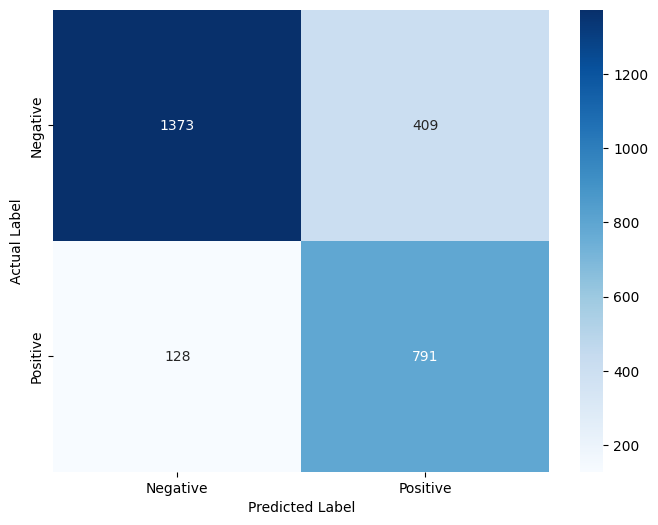

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, labels=None, title='Confusion Matrix'):
    # Set the context for the plot
    #sns.set_context('talk')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
#plt.title('Confusion Matrix')
    #plt.savefig('confusion_matrix.jpg', format='jpg', bbox_inches='tight')
    plt.show()


# Example usage
cm = cm1
labels = test_labels
plot_confusion_matrix(cm, labels, 'My Confusion Matrix')


In [17]:
import zipfile
import os

def zip_folder(folder_path, output_filename):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create a path to the file
                file_path = os.path.join(root, file)
                # Add file to the zip file
                zipf.write(file_path, os.path.relpath(file_path, os.path.join(folder_path, '..')))

# Replace 'your_folder_path' with the path of the folder you want to zip
# Replace 'output_zip_file.zip' with the desired output zip file name
folder_path = 'random_split_withtrans_only'
output_zip_file = 'random_split_withtrans_only.zip'

zip_folder(folder_path, output_zip_file)


In [15]:
import zipfile
import os

def zip_folder(folder_path, output_filename):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create a path to the file
                file_path = os.path.join(root, file)
                # Add file to the zip file
                zipf.write(file_path, os.path.relpath(file_path, os.path.join(folder_path, '..')))

# Replace 'your_folder_path' with the path of the folder you want to zip
# Replace 'output_zip_file.zip' with the desired output zip file name
folder_path = 'heper_results'
output_zip_file = 'random_split_withrdkit_and_trans_datasplits.zip'

zip_folder(folder_path, output_zip_file)

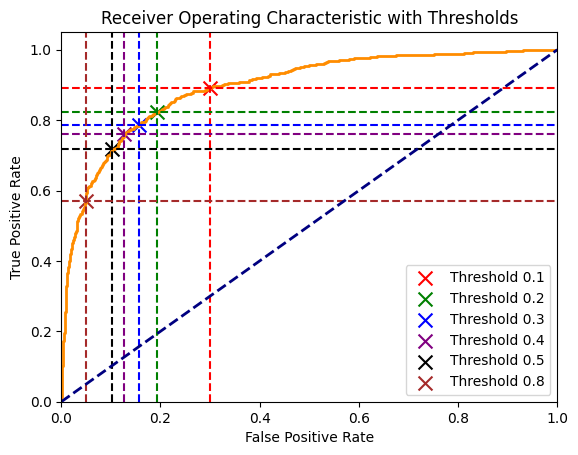

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

test_data = pd.read_csv("/content/chemprop/test_data.csv")
y_true = test_data['Activity'].to_list()

test_pred_data = pd.read_csv("/content/chemprop/random_split_withrdkit.csv")
test_pred_labels = test_pred_data['Activity'].to_list()
y_pred = test_pred_data['Activity'].to_list()
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve



# Highlight specific thresholds
threshold_points = [0.07, 0.2, 0.3, 0.4, 0.5, 0.8]
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)

# Highlight specific thresholds with cross lines in different colors

colors = ['red', 'green', 'blue', 'purple','black','brown']
for thresh, color in zip(threshold_points, colors):
    idx = np.where(thresholds > thresh)[-1][-1]
    plt.scatter(fpr[idx], tpr[idx], marker='x', color=color, s=100, label=f"Threshold {thresh:.1f}")
    plt.axvline(x=fpr[idx], color=color, linestyle='--')
    plt.axhline(y=tpr[idx], color=color, linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Thresholds')
plt.legend(loc="lower right")
plt.show()


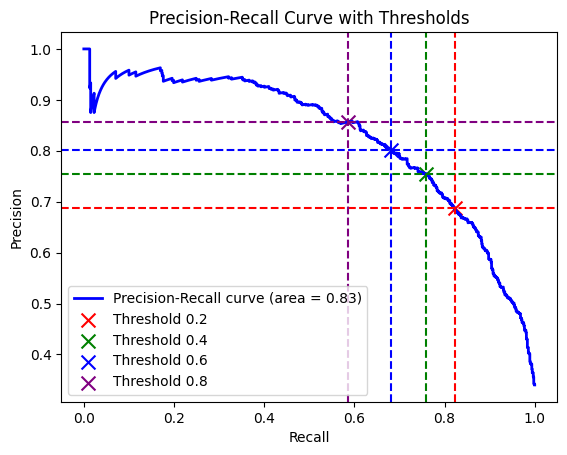

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import numpy as np


test_data = pd.read_csv("/content/chemprop/test_data.csv")
true_labels = test_data['Activity'].to_list()

test_pred_data = pd.read_csv("/content/chemprop/random_split_withrdkit.csv")
predicted_probs = test_pred_data['Activity'].to_list()

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probs)
pr_auc = auc(recall, precision)


# Plot the Precision-Recall curve
# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)

# Highlight specific thresholds and cross them on the axis
threshold_points = [0.2, 0.4, 0.6, 0.8]
colors = ['red', 'green', 'blue', 'purple']
for thresh, color in zip(threshold_points, colors):
    idx = np.where(thresholds >= thresh)[0][0]
    plt.scatter(recall[idx], precision[idx], marker='x', color=color, s=100, label=f"Threshold {thresh:.1f}")
    plt.axvline(x=recall[idx], color=color, linestyle='--')
    plt.axhline(y=precision[idx], color=color, linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Thresholds')
plt.legend(loc="lower left")
plt.show()



In [14]:
!python interpret.py --data_path /content/chemprop/test_data.csv --checkpoint_path /content/chemprop/newtrain2/fold_0/model_0/model.pt

Streaming output truncated to the last 5000 lines.
[20:34:36] Can't kekulize mol.  Unkekulized atoms: 5 6 11 12 14 20 21 22 23
[20:34:36] Can't kekulize mol.  Unkekulized atoms: 4 5 10 11 13 19 20 21 22
[20:34:37] Can't kekulize mol.  Unkekulized atoms: 2 3 9 10 11 12 17 18 20
[20:34:37] Can't kekulize mol.  Unkekulized atoms: 2 3 9 10 11 12 17 18 19
[20:34:37] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 13 19
[20:34:38] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 13 15
[20:34:38] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10 11 12 13 14
[20:34:39] Can't kekulize mol.  Unkekulized atoms: 2 7 8 9 10
[20:34:39] Can't kekulize mol.  Unkekulized atoms: 2 5 6 7 8
[20:34:39] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:34:39] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 20 25 26
[20:34:39] Can't kekulize mol.  Unkekulized atoms: 5 6 11 12 14 24 26 27 28
[20:34:40] Can't kekulize mol.  Unkekulized atoms: 5 6 11 12 14 23 25 26 27
[20:34:40] 

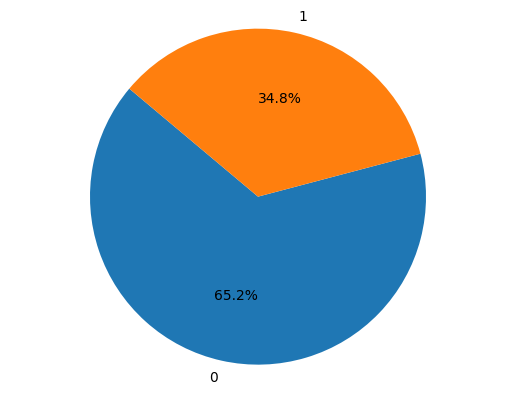

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'binaryData.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Count the occurrences of 0 and 1 in the 'Activity' column
activity_counts = df['Activity'].value_counts()

# Check if the dataframe contains both 0 and 1 in the 'Activity' column
if 0 not in activity_counts:
    activity_counts[0] = 0
if 1 not in activity_counts:
    activity_counts[1] = 0

# Plotting
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Distribution of Activity (0 and 1)')
plt.show()


In [ ]:
j = pd.read_csv("/content/target_test_johnson_V2.csv")
unique_df = j.drop_duplicates(subset=['SMILES'])

# If you want to reset the indices in the new DataFrame
unique_df.reset_index(drop=True, inplace=True)
unique_df.shape

(1633, 3)

In [ ]:
unique_df.head()

,SMILES,Protein,Y
0,OC(=O)c1csc(n1)-c1cccs1,MLFGMARIAIIGGGSIGEALLSGLLRAGRQVKDLVVAERMPDRANY...,0
1,O=C(N1CCOCC1)c1ccc(nc1)C(=O)N1CCOCC1,MLFGMARIAIIGGGSIGEALLSGLLRAGRQVKDLVVAERMPDRANY...,0
2,CCCC(=O)Nc1ccc2OC[C@H]3O[C@@H](CC(=O)NCC4CC4)C...,MSRAALDKDPRDVASMFDGVARKYDLTNTVLSLGQDRYWRRATRSA...,0
3,Cc1sc2nc(CN3CCCC3)nc(Cl)c2c1C,MSGMILDELSWRGLIAQSTDLDTLAAEAQRGPMTVYAGFDPTAPSL...,0
4,CCCc1cc(=O)n2nc(sc2n1)N1CCC(CC1)C(=O)Nc1cccc(c...,MSRAALDKDPRDVASMFDGVARKYDLTNTVLSLGQDRYWRRATRSA...,0


In [ ]:
del unique_df['Protein']

In [ ]:
unique_df.columns = ['smile','number']

In [ ]:
smiles = smiles.loc[~smiles['smile'].isin(jj)]
smiles.shape

(45584, 2)

In [ ]:
import pandas as pd
import random

# Assuming you have a DataFrame called df with a 'number' column
# First, filter rows where 'number' is equal to 0
filtered_df = smiles[smiles['number'] == 0]

# Check if there are at least 1000 rows with 'number' equal to 0
if len(filtered_df) >= 1000:
    # Randomly select 1000 rows
    random_indices = random.sample(filtered_df.index.tolist(), 1000)
    selected_rows = filtered_df.loc[random_indices]

    # Delete the selected rows from the main DataFrame and reset indices
    smiles = smiles.drop(random_indices)
    smiles.reset_index(drop=True, inplace=True)
else:
    # Handle the case where there are fewer than 1000 rows with 'number' equal to 0
    selected_rows = filtered_df  # You can choose to keep all available rows or handle it differently

# Now, 'selected_rows' contains the randomly selected 1000 rows where 'number' is equal to 0,
# and 'df' is the main DataFrame with the selected rows removed and indices reset.


In [ ]:
smiles.shape

(44584, 2)

In [ ]:
selected_rows.head(2)

,smile,number
8931,CN1C(CCl)Nc2cc(Cl)c(cc2S1(=O)=O)S(N)(=O)=O,0
17386,CC(C)(C)c1ccc(cc1)C(=O)C1CC1,0


In [ ]:
testset = pd.DataFrame()
testset = pd.concat([unique_df,selected_rows], axis = 0)
testset.head(100)

,smile,number
0,OC(=O)c1csc(n1)-c1cccs1,0
1,O=C(N1CCOCC1)c1ccc(nc1)C(=O)N1CCOCC1,0
2,CCCC(=O)Nc1ccc2OC[C@H]3O[C@@H](CC(=O)NCC4CC4)C...,0
3,Cc1sc2nc(CN3CCCC3)nc(Cl)c2c1C,0
4,CCCc1cc(=O)n2nc(sc2n1)N1CCC(CC1)C(=O)Nc1cccc(c...,0
...,...,...
95,OC[C@@H]1N(C(=O)C2CCCC2)C2(CN(Cc3ccc(F)cc3)C2)...,0
96,CN(\C(c1ccccc1)=N\S(=O)(=O)c1ccccc1)S(=O)(=O)c...,0
97,O=C(NN=C1C2CC3CC(C2)CC1C3)c1cccs1,0
98,CN(CC(=O)Nc1ccc(F)cc1)C(=O)c1cn(nc1-c1cccs1)-c...,0


In [ ]:
testset.to_csv("testset.csv",index = False)

In [ ]:
smiles.to_csv("trainset.csv", index = False)

In [ ]:
testset.shape, smiles.shape

((2633, 2), (44584, 2))

In [ ]:
max(smiles["number"])

1

In [ ]:
column = ["SMILES", "Active"]
testdatasmiles.columns = column

In [ ]:
testdatasmiles.head()

In [ ]:
testdatasmiles.to_csv("test_mtb.csv", index = False)

After getting into the repository we can run the train.py file with related arguments.

The most important part is to getting the input files include trin-val-test files.

The next important part is about the features,
if we set nothing for the features, the model which is based on DMPNN by defaults is generating some sort of features.

If we want to ask the model to generate features such as RDKit one or atom/bond features we can send the arguments in this way:

>> --features_generator rdkit_2d_normalized

we can also generate our features out of this scope and use the files here. Just we should care that the sort of features for train-test-val files should be in same order with molecules in the related files.

Here we have extra metrics that defined like,
>> --extra_metrics {prc-auc,f1}


In [ ]:
! python train.py --data_path /content/chemprop/trainset.csv --separate_test_path /content/chemprop/testset.csv --dataset_type classification --save_dir /content/chemprop/newtrain --smiles_column smile --target_column number   --extra_metrics {prc-auc,f1}

Streaming output truncated to the last 5000 lines.
  8% 54/714 [00:13<01:52,  5.86it/s]
  8% 55/714 [00:13<01:58,  5.55it/s]
  8% 57/714 [00:13<01:40,  6.51it/s]
  8% 59/714 [00:13<01:18,  8.38it/s]
  9% 61/714 [00:13<01:26,  7.55it/s]
  9% 62/714 [00:14<01:24,  7.76it/s]
  9% 63/714 [00:14<02:24,  4.49it/s]Loss = 4.9734e-01, PNorm = 56.8823, GNorm = 0.6454, lr_0 = 2.2536e-04

  9% 65/714 [00:14<01:52,  5.77it/s]
  9% 67/714 [00:14<01:31,  7.04it/s]
 10% 68/714 [00:15<01:39,  6.50it/s]
 10% 70/714 [00:15<01:25,  7.49it/s]
 10% 71/714 [00:15<01:40,  6.43it/s]
 10% 73/714 [00:15<01:38,  6.51it/s]Loss = 4.9855e-01, PNorm = 56.8914, GNorm = 0.9107, lr_0 = 2.2510e-04

 11% 75/714 [00:16<01:22,  7.77it/s]
 11% 76/714 [00:16<01:34,  6.79it/s]
 11% 78/714 [00:16<01:21,  7.80it/s]
 11% 79/714 [00:16<01:26,  7.35it/s]
 11% 81/714 [00:16<01:25,  7.44it/s]
 12% 83/714 [00:17<01:09,  9.09it/s]Loss = 4.9839e-01, PNorm = 56.8992, GNorm = 0.7142, lr_0 = 2.2485e-04

 12% 85/714 [00:17<01:12,  8.72it/s]

After running with the full dataset we can train the model with different lower sizes of train set.

Because the dataset is highly unbalanced it is better to seperate the active and inactive molecules then select lower sizes from each set seperatly and then concatenate them.

In [ ]:
!chemprop_predict --test_path /content/chemprop/testset.csv --checkpoint_dir /content/chemprop/newtrain --smiles_column smile   --preds_path /content/chemprop/tox21_preds.csv

Loading training args
Setting molecule featurization parameters to default.
Loading data
2633it [00:00, 324926.52it/s]
100% 2633/2633 [00:00<00:00, 165234.34it/s]
Validating SMILES
Test size = 2,633
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0% 0/1 [00:00<?, ?it/s]Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W

In [ ]:
!chemprop_predict --test_path /content/chemprop/testset.csv --checkpoint_dir tox21_checkpoints --preds_path tox21_preds.csv

Traceback (most recent call last):
  File "/usr/local/bin/chemprop_predict", line 33, in <module>
    sys.exit(load_entry_point('chemprop', 'console_scripts', 'chemprop_predict')())
  File "/content/chemprop/chemprop/train/make_predictions.py", line 506, in chemprop_predict
    make_predictions(args=PredictArgs().parse_args())
  File "/usr/local/lib/python3.10/dist-packages/tap/tap.py", line 467, in parse_args
    self.process_args()
  File "/content/chemprop/chemprop/args.py", line 923, in process_args
    super(PredictArgs, self).process_args()
  File "/content/chemprop/chemprop/args.py", line 212, in process_args
    self.checkpoint_paths = get_checkpoint_paths(
  File "/content/chemprop/chemprop/args.py", line 58, in get_checkpoint_paths
    raise ValueError(f'Failed to find any checkpoints with extension "{ext}" in directory "{checkpoint_dir}"')
ValueError: Failed to find any checkpoints with extension ".pt" in directory "tox21_checkpoints"


In [ ]:
train = pd.read_csv("train.csv")
train.head()

,Mac-ID,SMILES,Avg-B-Score,Avg-Res-Growth,Active
0,MAC-0026707,S(=O)(=O)(CC#N)c1ccc(OC(F)(F)F)cc1\t,-2.6500,0.8840,0
1,MAC-0152114,c1(c(c(c(c(c1F)F)F)F)F)CO\t,2.9270,1.0275,0
2,MAC-0168347,C(=O)(NC(C)C)C(c1ccc(cc1)CC(C)C)C\t,-1.5835,1.0220,0
3,MAC-0168576,C(=O)(c1ccccc1)C(CCC(=O)N)C\t,0.9900,0.9080,0
4,MAC-0026873,S(=O)(=O)(Nc1c(C(=O)OC)ccc(C(=O)OC)c1)C\t,1.0480,1.0455,0


In [ ]:
train['Active'].value_counts()

0    23426
1      203
Name: Active, dtype: int64

In [ ]:
train1 = train.loc[train['Active']==1]
train1.shape

(203, 5)

In [ ]:
train0 = train.loc[train['Active']==0]
train0.shape

(23426, 5)

Now, here we can change the frac number from 0.90 to 0.80, 0.70, etc. Keep the other arguments exactly same and compare the results!

In [ ]:
df_subset_1_90 = train1.sample(frac=0.90)


df_subset_0_90 = train0.sample(frac=0.90)


concate90 = df_subset_1_90.append(df_subset_0_90)

concate90.to_csv("concate90.csv", index = False)

In [ ]:
! python train.py --data_path /content/chemprop/concate90.csv  --separate_val_path /content/chemprop/val.csv --separate_test_path /content/chemprop/test.csv --dataset_type classification --save_dir /content/chemprop/newtrain --smiles_column SMILES --target_column Active   --extra_metrics {prc-auc,f1}